In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import os 

In [86]:
os.listdir()

['.config', 'drive', 'sample_data']

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
df_data = pd.read_excel("/content/drive/MyDrive/win prediction/Win_Prediction_Data.xlsx")

In [89]:
df_data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [90]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [91]:
df_data.duplicated().sum()

14

In [92]:
df_data[df_data.duplicated()]

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
3036,Domestic Public Bank,Solution 32,2015-03-20,Sector 2,L7,Rosanna Maynez,Earline Langton,735294.12,Lost
3385,Tech,Solution 32,2015-07-31,Sector 2,L10,Long Bergstrom,Emil Knudsen,235294.12,Lost
3880,Telecom,Solution 12,2013-08-30,Sector 24,Others,Mangesh K. Singh,Sohil Kumar,588235.29,Lost
5037,Tech,Solution 13,2012-05-08,Sector 23,L5,Sargar Deep Rao,Karan Dubey,0.00,Lost
7637,Govt,Solution 34,2018-02-21,Sector 4,L10,Mervin Harwood,Akshay Sharma,602941.18,Lost
7705,Internal,Solution 9,2015-01-06,Sector 20,Others,Sargar Deep Rao,Brenton Launius,2120294.12,Lost
7718,Services_based,Solution 26,2018-02-11,Sector 17,L10,Molly Eakes,vansu dev,264705.88,Lost
8020,Internal,Solution 9,2015-07-02,Sector 2,L9,Sargar Deep Rao,Rahul Kocher,264705.88,Lost
8167,Infrastructure,Solution 9,2015-05-18,Sector 24,L10,Mervin Harwood,nahar singh,352941.18,Lost
8177,Services_based,Solution 9,2015-10-03,Sector 23,L1,Ankita Aggarwal,bhagwati prasad,147058.82,Lost


In [93]:
df_data.columns[df_data.isna().any()]

Index(['Client Category'], dtype='object')

In [94]:
df_data['Client Category'].value_counts()

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [95]:
df_data.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [96]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Deal Cost,10061.0,766896.870734,1.619894e+06,0.0,189705.88,382352.94,764705.88,36764705.88


In [97]:
df_data.describe(include="object").T

,count,unique,top,freq
Client Category,9982,41,Others,1763
Solution Type,10061,67,Solution 32,1439
Sector,10061,25,Sector 23,2693
Location,10061,13,L10,3360
VP Name,10061,43,Mervin Harwood,1166
Manager Name,10061,278,Molly Eakes,323
Deal Status Code,10061,2,Lost,6306


In [98]:
categorical_features = [col_name for col_name in df_data.columns
                        if df_data[col_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Client Category', 'Solution Type', 'Sector', 'Location', 'VP Name', 'Manager Name', 'Deal Status Code']


In [99]:
numerical_features = [col_name for col_name in df_data.columns
                        if df_data[col_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 2
Numerical Features:  ['Deal Date', 'Deal Cost']


In [100]:
for each_feature in categorical_features:
    unique_values = len(df_data[each_feature].unique())
    print("no. of unique values of {} are: {}".format(each_feature, unique_values))

no. of unique values of Client Category are: 42
no. of unique values of Solution Type are: 67
no. of unique values of Sector are: 25
no. of unique values of Location are: 13
no. of unique values of VP Name are: 43
no. of unique values of Manager Name are: 278
no. of unique values of Deal Status Code are: 2


In [101]:
for each_feature in numerical_features:
    unique_values = len(df_data[each_feature].unique())
    print("no. of unique values of {} are: {}".format(each_feature, unique_values))

no. of unique values of Deal Date are: 2555
no. of unique values of Deal Cost are: 1469


In [102]:
df_data["Client Category"].unique()

array(['Telecom', 'Internal', 'Govt', 'Consumer Good',
       'International Bank', 'Domestic Public Bank', 'Finance',
       'Manufacturing', 'Services_based', 'Research Development',
       'Others', 'Hospitality', 'Consulting', 'Retail_market', 'Energy ',
       'Domestic Private Bank', 'Industries', 'Tech', 'Healthcare',
       'Electronics', 'Domestic Bank', 'Automobiles', 'Medical ',
       'Infrastructure', 'Pharma', 'Power ind', 'Holding', 'Logistics',
       'Insurance', 'Payment', 'Energy', 'Govt Bank Special',
       'Management', 'Media_Journal', 'International Org', 'Real Estate',
       nan, 'Tax_audit', 'Share_market', 'Knowledge', 'Airpline',
       'e-commerce'], dtype=object)

In [103]:
#df_data.isnull().sum()

In [104]:
#df_data.sort_values(by=["Client Category"],ascending=True)

In [105]:
#df_data['Date'] = pd.to_datetime(df_data['Deal Date'])
df_data['year'] = df_data['Deal Date'].dt.year
df_data['month'] = df_data['Deal Date'].dt.month
df_data['day'] = df_data['Deal Date'].dt.day

In [106]:
df_data.drop('Deal Date', axis = 1, inplace = True)
df_data.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,year,month,day
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3,27
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9,25
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8,1
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4,28
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6,3


In [107]:
df_data[df_data["Deal Cost"]==0.0] 
df_data["Deal Cost"].median()
df_data["Deal Cost"]=np.where((df_data["Deal Cost"]==0.0),df_data["Deal Cost"].median(),df_data["Deal Cost"])

In [108]:
df_data[df_data["Deal Cost"]==0.0]

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,year,month,day


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


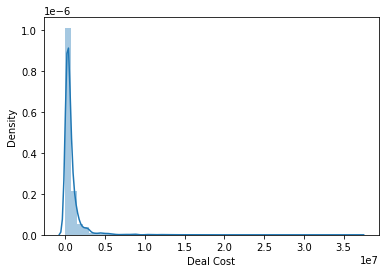

In [109]:
sns.distplot(df_data['Deal Cost'])

In [110]:
categorical_features = [col_name for col_name in df_data.columns 
                        if df_data[col_name].dtype == 'O']
df_data[categorical_features].isnull().sum()

Client Category     79
Solution Type        0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Status Code     0
dtype: int64

In [111]:
#missing val
categorical_features_with_null = [feature for feature in categorical_features
if df_data[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = df_data[each_feature].mode()[0]
    print(mode_val)
    df_data[each_feature].fillna(mode_val,inplace=True)

Others


In [112]:
df_data.isnull().sum()

Client Category     0
Solution Type       0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
year                0
month               0
day                 0
dtype: int64

In [113]:
df_data['Client Category'].value_counts()

Others                   1842
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [114]:
print(df_data['Client Category'].nunique())
df_data['Client Category'].unique()

41


array(['Telecom', 'Internal', 'Govt', 'Consumer Good',
       'International Bank', 'Domestic Public Bank', 'Finance',
       'Manufacturing', 'Services_based', 'Research Development',
       'Others', 'Hospitality', 'Consulting', 'Retail_market', 'Energy ',
       'Domestic Private Bank', 'Industries', 'Tech', 'Healthcare',
       'Electronics', 'Domestic Bank', 'Automobiles', 'Medical ',
       'Infrastructure', 'Pharma', 'Power ind', 'Holding', 'Logistics',
       'Insurance', 'Payment', 'Energy', 'Govt Bank Special',
       'Management', 'Media_Journal', 'International Org', 'Real Estate',
       'Tax_audit', 'Share_market', 'Knowledge', 'Airpline', 'e-commerce'],
      dtype=object)

In [115]:
df_data[df_data['Client Category']=="Energy"].nunique()

Client Category      1
Solution Type       15
Sector               6
Location             5
VP Name             16
Manager Name        30
Deal Cost           32
Deal Status Code     2
year                 8
month               12
day                 28
dtype: int64

In [116]:
df_data["Client Category"]=df_data["Client Category"].replace(["Energy", "Energy "], "Energy")

In [117]:
def encode_data(feature_name):
    mapping_dict = {}
    unique_values = list(df_data[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    return mapping_dict

In [118]:
print(df_data['Client Category'].nunique())
print(df_data['Client Category'].unique())

df_data['Client Category'].replace(encode_data('Client Category'),inplace = True)

print(df_data['Client Category'].nunique())
print(df_data['Client Category'].unique())

40
['Telecom' 'Internal' 'Govt' 'Consumer Good' 'International Bank'
 'Domestic Public Bank' 'Finance' 'Manufacturing' 'Services_based'
 'Research Development' 'Others' 'Hospitality' 'Consulting'
 'Retail_market' 'Energy' 'Domestic Private Bank' 'Industries' 'Tech'
 'Healthcare' 'Electronics' 'Domestic Bank' 'Automobiles' 'Medical '
 'Infrastructure' 'Pharma' 'Power ind' 'Holding' 'Logistics' 'Insurance'
 'Payment' 'Govt Bank Special' 'Management' 'Media_Journal'
 'International Org' 'Real Estate' 'Tax_audit' 'Share_market' 'Knowledge'
 'Airpline' 'e-commerce']
40
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [119]:
print(df_data['Client Category'].nunique())
print(df_data['Client Category'].unique())

df_data['Client Category'].replace(encode_data('Client Category'),inplace = True)

print(df_data['Client Category'].nunique())
print(df_data['Client Category'].unique())

40
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
40
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [120]:
print(df_data['Solution Type'].nunique())
print(df_data['Solution Type'].unique())

df_data['Solution Type']=df_data['Solution Type'].str.replace('Solution ','')

print(df_data['Solution Type'].nunique())
print(df_data['Solution Type'].unique())

67
['Solution 7' 'Solution 59' 'Solution 32' 'Solution 42' 'Solution 6'
 'Solution 20' 'Solution 37' 'Solution 31' 'Solution 39' 'Solution 3'
 'Solution 30' 'Solution 33' 'Solution 29' 'Solution 40' 'Solution 14'
 'Solution 67' 'Solution 10' 'Solution 28' 'Solution 47' 'Solution 36'
 'Solution 44' 'Solution 38' 'Solution 55' 'Solution 35' 'Solution 2'
 'Solution 34' 'Solution 48' 'Solution 52' 'Solution 61' 'Solution 11'
 'Solution 12' 'Solution 15' 'Solution 4' 'Solution 46' 'Solution 63'
 'Solution 60' 'Solution 65' 'Solution 24' 'Solution 41' 'Solution 13'
 'Solution 50' 'Solution 66' 'Solution 25' 'Solution 8' 'Solution 16'
 'Solution 51' 'Solution 58' 'Solution 26' 'Solution 17' 'Solution 49'
 'Solution 27' 'Solution 53' 'Solution 1' 'Solution 45' 'Solution 9'
 'Solution 64' 'Solution 5' 'Solution 62' 'Solution 57' 'Solution 43'
 'Solution 23' 'Solution 22' 'Solution 54' 'Solution 56' 'Solution 18'
 'Solution 19' 'Solution 21']
67
['7' '59' '32' '42' '6' '20' '37' '31' '39' '3' '3

In [121]:
print(df_data['Sector'].nunique())
print(df_data['Sector'].unique())

df_data['Sector']=df_data['Sector'].str.replace('Sector ','')

print(df_data['Sector'].nunique())
print(df_data['Sector'].unique())

25
['Sector 24' 'Sector 20' 'Sector 2' 'Sector 13' 'Sector 12' 'Sector 15'
 'Sector 17' 'Sector 23' 'Sector 14' 'Sector 22' 'Sector 9' 'Sector 16'
 'Sector 25' 'Sector 1' 'Sector 4' 'Sector 18' 'Sector 3' 'Sector 6'
 'Sector 21' 'Sector 8' 'Sector 11' 'Sector 19' 'Sector 5' 'Sector 7'
 'Sector 10']
25
['24' '20' '2' '13' '12' '15' '17' '23' '14' '22' '9' '16' '25' '1' '4'
 '18' '3' '6' '21' '8' '11' '19' '5' '7' '10']


In [122]:
print(df_data["Location"].value_counts(dropna=False))
print(df_data['Location'].nunique())
print(df_data['Location'].unique())

df_data['Location']=df_data['Location'].str.replace('Others','0')
df_data['Location']=df_data['Location'].str.replace('L','')

print(df_data['Location'].nunique())
print(df_data['Location'].unique())

L10       3360
L5        2328
L1        1572
Others     817
L3         556
L11        367
L12        276
L9         240
L7         238
L4         188
L6         100
L8          11
L2           8
Name: Location, dtype: int64
13
['L5' 'Others' 'L10' 'L11' 'L1' 'L4' 'L9' 'L3' 'L7' 'L6' 'L12' 'L2' 'L8']
13
['5' '0' '10' '11' '1' '4' '9' '3' '7' '6' '12' '2' '8']


In [123]:
print(df_data["VP Name"].value_counts(dropna=False))
print(df_data['VP Name'].nunique())

Mervin Harwood         1166
Ankita Aggarwal        1143
Sargar Deep Rao         956
Long Bergstrom          921
Mangesh K. Singh        812
Rosanna Maynez          662
Ekta Zutshi             550
Rahul Bajpai            523
neeraj kumar            471
Son Mcconnaughy         232
som dutt                220
Hardeep Suksma          208
Brendon Wycoff          189
Clinton Mani            184
Saurabh Singh           176
Jewell Tunstall         156
Rudraksh Sharma         147
Gopa Trilochana         136
Russell Dahlen          133
Alam Syed               126
Molly Eakes             126
Gaurav Sameria          114
Gayle Molter            104
Varsha Arora            104
Vidur Hukle             100
Earline Langton          82
Manpreet Singh           46
Mayank Mewar             41
Rahul Kocher             32
Marcella Mo              32
Man Suddeth              29
Jitendra Choudhary       28
Prashant Rawat           27
Lilli Storrs             26
Vikram Rawat             17
Kamelesh Srinivasan 

In [124]:
print(df_data["Manager Name"].value_counts(dropna=False))
print(df_data['Manager Name'].nunique())


Molly Eakes        323
Rudraksh Sharma    270
Desmond Krout      230
Gayle Molter       186
Manpreet Singh     181
                  ... 
pooran chand         1
Uzaar Ali            1
Ali Rafiq            1
Anish Jonson         1
Heath Mullarkey      1
Name: Manager Name, Length: 278, dtype: int64
278


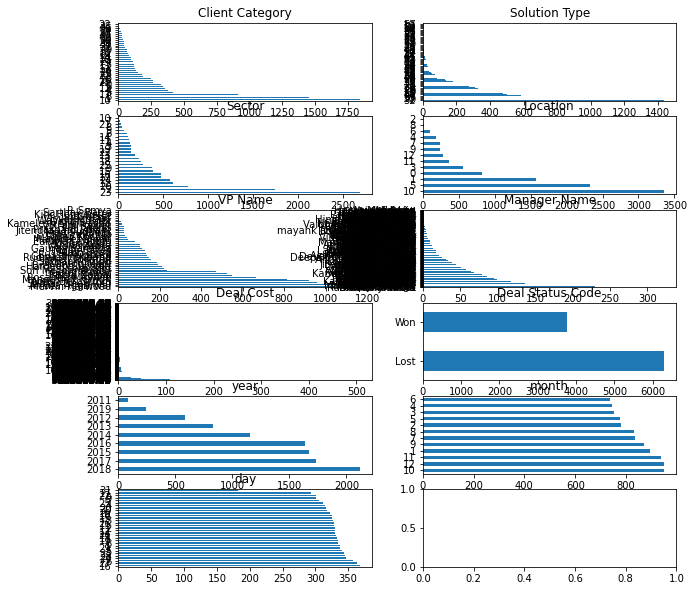

In [125]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=[10, 10])
df_data['Client Category'].value_counts().plot(kind='barh', ax=axes[0,0], title='Client Category')
df_data['Solution Type'].value_counts().plot(kind='barh', ax=axes[0,1], title='Solution Type')
df_data['Sector'].value_counts().plot(kind='barh', ax=axes[1,0], title='Sector')
df_data['Location'].value_counts().plot(kind='barh', ax=axes[1,1], title='Location')
df_data['VP Name'].value_counts().plot(kind='barh', ax=axes[2,0], title='VP Name')
df_data['Manager Name'].value_counts().plot(kind='barh', ax=axes[2,1], title='Manager Name')
df_data['Deal Cost'].value_counts().plot(kind='barh', ax=axes[3,0], title='Deal Cost')
df_data['Deal Status Code'].value_counts().plot(kind='barh', ax=axes[3,1], title='Deal Status Code')
df_data['year'].value_counts().plot(kind='barh', ax=axes[4,0], title='year')
df_data['month'].value_counts().plot(kind='barh', ax=axes[4,1], title='month')
df_data['day'].value_counts().plot(kind='barh', ax=axes[5,0], title='day') 


Lost    6306
Won     3755
Name: Deal Status Code, dtype: int64
['Won' 'Lost']


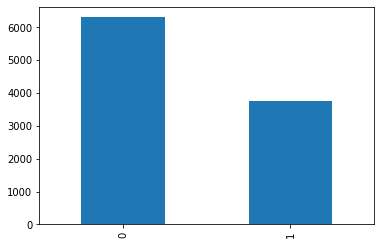

In [126]:
print(df_data["Deal Status Code"].value_counts(dropna=False))
print(df_data["Deal Status Code"].unique())
#df_data["Deal Status Code"] = df_data["Deal Status Code"].fillna("Unknown")
df_data['Deal Status Code'] = df_data['Deal Status Code'].map({'Won':1,'Lost':0})
df_data['Deal Status Code']=df_data['Deal Status Code'].astype(int)
df_data["Deal Status Code"].value_counts().plot(kind="bar")

Analysis with Deal Status code vs VP Name

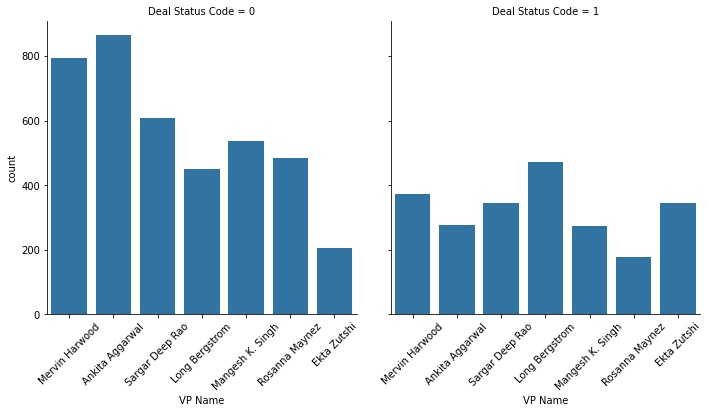

In [127]:
g = sns.FacetGrid(df_data,col="Deal Status Code",height=5)
g.map(sns.countplot, 'VP Name',order = df_data['VP Name'].value_counts().iloc[0:7].index)
g.set_xticklabels(rotation=45) 
plt.show()

Analysis with Deal Status code vs Manager Name

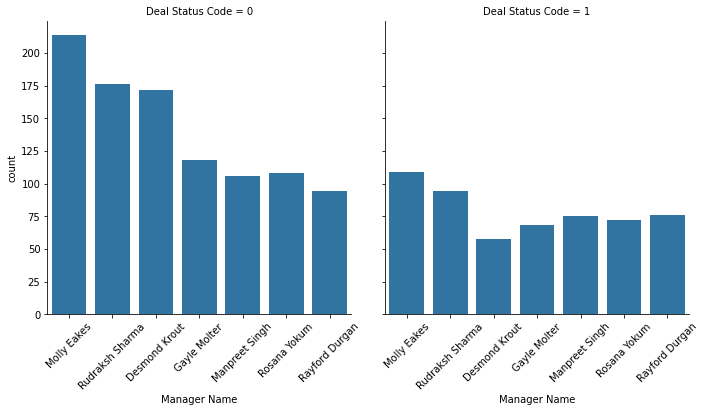

In [128]:
g = sns.FacetGrid(df_data,col="Deal Status Code",height=5)
g.map(sns.countplot, 'Manager Name',order = df_data['Manager Name'].value_counts().iloc[0:7].index)
g.set_xticklabels(rotation=45) 
plt.show()

Distribution of Deal Cost with Deal Status

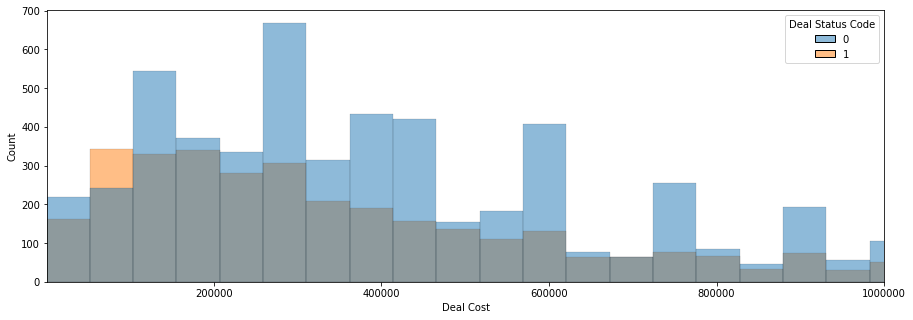

In [129]:
fig, ax = plt.subplots(figsize = (15,5))
sns.histplot(x='Deal Cost',hue = 'Deal Status Code',data=df_data, ax=ax,fill=True)
ax.set_xlim(1000,1000000)
ax.ticklabel_format(style='plain', axis='x')
plt.show()


Identifying Top 5 Bid Manager-SBU Head Combination

In [130]:
#Combining VP name and Manager Name to create new feature named as "VP_Manager"
df_data['VP Manager']=df_data['VP Name']+" "+ df_data['Manager Name']
df_data

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,year,month,day,VP Manager
0,0,7,24,5,Ekta Zutshi,Gopa Trilochana,150000.00,1,2012,3,27,Ekta Zutshi Gopa Trilochana
1,0,7,24,5,Ekta Zutshi,Gopa Trilochana,744705.88,1,2012,9,25,Ekta Zutshi Gopa Trilochana
2,1,59,20,0,Ekta Zutshi,Russell Dahlen,60000.00,0,2011,8,1,Ekta Zutshi Russell Dahlen
3,1,59,20,0,Ekta Zutshi,Russell Dahlen,60000.00,0,2011,4,28,Ekta Zutshi Russell Dahlen
4,1,32,20,0,Ekta Zutshi,Russell Dahlen,80882.35,0,2011,6,3,Ekta Zutshi Russell Dahlen
...,...,...,...,...,...,...,...,...,...,...,...,...
10056,25,9,9,5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,2019,3,18,Rudraksh Sharma Rudraksh Sharma
10057,1,6,20,0,Rudraksh Sharma,Sharavan Singh,777058.82,1,2019,3,4,Rudraksh Sharma Sharavan Singh
10058,25,9,9,5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,2019,2,28,Rudraksh Sharma Rudraksh Sharma
10059,25,62,9,5,Man Suddeth,Cleotilde Biron,3042058.82,1,2019,1,27,Man Suddeth Cleotilde Biron


In [131]:
#Dropping unrelevant cols
#df_data.drop('VP Name',axis=1,inplace=True)
#df_data.drop('Manager Name',axis=1,inplace=True)

In [132]:
#Calculating frequency of each VP_Manager
Total=pd.DataFrame({'VP Manager':df_data['VP Manager'].value_counts().index,'Total Deals':df_data['VP Manager'].value_counts().values})
Total

,VP Manager,Total Deals
0,Ankita Aggarwal Desmond Krout,213
1,Rahul Bajpai Rudraksh Sharma,198
2,neeraj kumar Molly Eakes,144
3,Long Bergstrom Jewell Tunstall,126
4,Sargar Deep Rao Manpreet Singh,122
...,...,...
955,Ankita Aggarwal Uzaar Ali,1
956,Sargar Deep Rao Rahul Bajpai,1
957,Hardeep Suksma Aastha Gandhi,1
958,Vidur Hukle Rahul Kocher,1


In [133]:
Win_data=df_data[df_data['Deal Status Code']==1]
Win_data.head()


,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,year,month,day,VP Manager
0,0,7,24,5,Ekta Zutshi,Gopa Trilochana,150000.00,1,2012,3,27,Ekta Zutshi Gopa Trilochana
1,0,7,24,5,Ekta Zutshi,Gopa Trilochana,744705.88,1,2012,9,25,Ekta Zutshi Gopa Trilochana
6,1,59,2,10,Mervin Harwood,rahul sharma,526176.47,1,2011,11,3,Mervin Harwood rahul sharma
8,3,42,12,10,Lilli Storrs,Md. Daud,1032352.94,1,2012,4,11,Lilli Storrs Md. Daud
10,4,6,2,10,Long Bergstrom,Luv Malhotra,316176.47,1,2012,2,11,Long Bergstrom Luv Malhotra


In [134]:
# Calculating won deals frequency 
win_deals=pd.DataFrame({'VP Manager':Win_data['VP Manager'].value_counts().index,'Won deals':Win_data['VP Manager'].value_counts().values})
win_deals

,VP Manager,Won deals
0,Long Bergstrom Russell Dahlen,75
1,Rahul Bajpai Rudraksh Sharma,72
2,neeraj kumar Molly Eakes,62
3,Ankita Aggarwal Desmond Krout,53
4,neeraj kumar Vinay Kumar,51
...,...,...
701,Man Suddeth kailash kumar,1
702,Hardeep Suksma Russell Dahlen,1
703,Rosanna Maynez khadak singh,1
704,Mervin Harwood Sai S Sabitha,1


In [135]:
Loss_data=df_data[df_data['Deal Status Code']==0]
Loss_data.head()


,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,year,month,day,VP Manager
2,1,59,20,0,Ekta Zutshi,Russell Dahlen,60000.00,0,2011,8,1,Ekta Zutshi Russell Dahlen
3,1,59,20,0,Ekta Zutshi,Russell Dahlen,60000.00,0,2011,4,28,Ekta Zutshi Russell Dahlen
4,1,32,20,0,Ekta Zutshi,Russell Dahlen,80882.35,0,2011,6,3,Ekta Zutshi Russell Dahlen
5,1,32,20,0,Ekta Zutshi,Russell Dahlen,80882.35,0,2011,5,24,Ekta Zutshi Russell Dahlen
7,2,7,13,5,Sargar Deep Rao,Vidur Hukle,409705.88,0,2012,9,17,Sargar Deep Rao Vidur Hukle


In [136]:
# Calculating loss deals frequency 
Loss_deals=pd.DataFrame({'VP Manager':Loss_data['VP Manager'].value_counts().index,'Loss deals':Loss_data['VP Manager'].value_counts().values})
Loss_deals

,VP Manager,Loss deals
0,Ankita Aggarwal Desmond Krout,160
1,Rahul Bajpai Rudraksh Sharma,126
2,Ankita Aggarwal Manish Saundriyal,96
3,Ankita Aggarwal rohit,84
4,neeraj kumar Molly Eakes,82
...,...,...
702,Sargar Deep Rao kailash kumar,2
703,Ankita Aggarwal Carroll Truehart,2
704,Son Mcconnaughy Son Mcconnaughy,2
705,Mangesh K. Singh Earline Langton,2


In [137]:
total_deals=pd.DataFrame({'VP Manager':df_data['VP Manager'].value_counts().index,'Total deals':df_data['VP Manager'].value_counts().values})
total_deals

,VP Manager,Total deals
0,Ankita Aggarwal Desmond Krout,213
1,Rahul Bajpai Rudraksh Sharma,198
2,neeraj kumar Molly Eakes,144
3,Long Bergstrom Jewell Tunstall,126
4,Sargar Deep Rao Manpreet Singh,122
...,...,...
955,Ankita Aggarwal Uzaar Ali,1
956,Sargar Deep Rao Rahul Bajpai,1
957,Hardeep Suksma Aastha Gandhi,1
958,Vidur Hukle Rahul Kocher,1


In [138]:
df_final1 = pd.merge(win_deals,Loss_deals,on=['VP Manager'],how='inner')


In [139]:
df_final = pd.merge(df_final1,total_deals,on=['VP Manager'],how='inner')


In [140]:
df_final  


,VP Manager,Won deals,Loss deals,Total deals
0,Long Bergstrom Russell Dahlen,75,30,105
1,Rahul Bajpai Rudraksh Sharma,72,126,198
2,neeraj kumar Molly Eakes,62,82,144
3,Ankita Aggarwal Desmond Krout,53,160,213
4,neeraj kumar Vinay Kumar,51,24,75
...,...,...,...,...
448,Clinton Mani Tanu Panwar,1,2,3
449,som dutt Davis Gagner,1,2,3
450,Man Suddeth kailash kumar,1,2,3
451,Rosanna Maynez khadak singh,1,2,3


Top 5 combination of SBU Head-Bid Manager.

In [141]:
df_test = df_final.drop_duplicates()
df_test['%_won'] = df_final['Won deals']*100/df_final['Total deals'] 
df_test['%_lost'] = df_final['Loss deals']*100/df_final['Total deals'] 
df_test = df_test.sort_values(by=['%_won'], ascending=False)
df_test.head(5)
#df_test.shape

,VP Manager,Won deals,Loss deals,Total deals,%_won,%_lost
37,Ekta Zutshi Manpreet Singh,20,2,22,90.909091,9.090909
53,Long Bergstrom Akshit Khanna,16,2,18,88.888889,11.111111
62,Rahul Bajpai Jitendra Choudhary,15,2,17,88.235294,11.764706
9,Ekta Zutshi neeraj kumar,40,6,46,86.956522,13.043478
68,Hardeep Suksma Atul Chaudhary,13,2,15,86.666667,13.333333


In [142]:
df_win_prob=df_test[df_test['Total deals'] > 50]
df_win_prob.head(5)


,VP Manager,Won deals,Loss deals,Total deals,%_won,%_lost
0,Long Bergstrom Russell Dahlen,75,30,105,71.428571,28.571429
4,neeraj kumar Vinay Kumar,51,24,75,68.000000,32.000000
10,Ekta Zutshi Jean Sappington,40,22,62,64.516129,35.483871
12,Ekta Zutshi Gayle Molter,37,22,59,62.711864,37.288136
19,Jewell Tunstall Atul Chaudhary,29,26,55,52.727273,47.272727


In [143]:
df_win_prob5=df_win_prob.head(5)

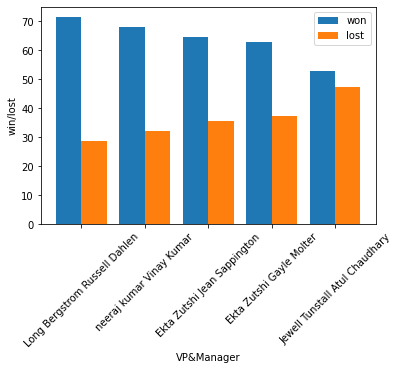

In [144]:
X_axis = np.arange(len(df_win_prob5["VP Manager"]))
plt.bar(X_axis - 0.2, df_win_prob5['%_won'], 0.4, label = 'won')
plt.bar(X_axis + 0.2, df_win_prob5['%_lost'], 0.4, label = 'lost')
  
plt.xticks(X_axis,df_win_prob5["VP Manager"],rotation=45)
plt.xlabel("VP&Manager")
plt.ylabel("win/lost")


plt.legend()
plt.show()

In [145]:
df_data

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,year,month,day,VP Manager
0,0,7,24,5,Ekta Zutshi,Gopa Trilochana,150000.00,1,2012,3,27,Ekta Zutshi Gopa Trilochana
1,0,7,24,5,Ekta Zutshi,Gopa Trilochana,744705.88,1,2012,9,25,Ekta Zutshi Gopa Trilochana
2,1,59,20,0,Ekta Zutshi,Russell Dahlen,60000.00,0,2011,8,1,Ekta Zutshi Russell Dahlen
3,1,59,20,0,Ekta Zutshi,Russell Dahlen,60000.00,0,2011,4,28,Ekta Zutshi Russell Dahlen
4,1,32,20,0,Ekta Zutshi,Russell Dahlen,80882.35,0,2011,6,3,Ekta Zutshi Russell Dahlen
...,...,...,...,...,...,...,...,...,...,...,...,...
10056,25,9,9,5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,2019,3,18,Rudraksh Sharma Rudraksh Sharma
10057,1,6,20,0,Rudraksh Sharma,Sharavan Singh,777058.82,1,2019,3,4,Rudraksh Sharma Sharavan Singh
10058,25,9,9,5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,2019,2,28,Rudraksh Sharma Rudraksh Sharma
10059,25,62,9,5,Man Suddeth,Cleotilde Biron,3042058.82,1,2019,1,27,Man Suddeth Cleotilde Biron


In [146]:
df_data.drop(["VP Name","Manager Name","month","day"], axis = 1, inplace = True)
df_data.head() 

,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status Code,year,VP Manager
0,0,7,24,5,150000.00,1,2012,Ekta Zutshi Gopa Trilochana
1,0,7,24,5,744705.88,1,2012,Ekta Zutshi Gopa Trilochana
2,1,59,20,0,60000.00,0,2011,Ekta Zutshi Russell Dahlen
3,1,59,20,0,60000.00,0,2011,Ekta Zutshi Russell Dahlen
4,1,32,20,0,80882.35,0,2011,Ekta Zutshi Russell Dahlen


Label Encoding

In [147]:
from sklearn.preprocessing import LabelEncoder
cols=("VP Manager","Deal Cost")
for c in cols:
  le=LabelEncoder()
  le.fit(list(df_data[c].values))
  df_data[c]=le.transform(list(df_data[c].values))

In [148]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Client Category   10061 non-null  int64 
 1   Solution Type     10061 non-null  object
 2   Sector            10061 non-null  object
 3   Location          10061 non-null  object
 4   Deal Cost         10061 non-null  int64 
 5   Deal Status Code  10061 non-null  int64 
 6   year              10061 non-null  int64 
 7   VP Manager        10061 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 628.9+ KB


change datatype of categorical column

In [149]:
df_data['Solution Type']=df_data['Solution Type'].astype(int)
df_data['Sector']=df_data['Sector'].astype(int)
df_data['Location']=df_data['Location'].astype(int)

In [150]:
df_data

,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status Code,year,VP Manager
0,0,7,24,5,227,1,2012,161
1,0,7,24,5,872,1,2012,161
2,1,59,20,0,80,0,2011,186
3,1,59,20,0,80,0,2011,186
4,1,32,20,0,110,0,2011,186
...,...,...,...,...,...,...,...,...
10056,25,9,9,5,771,0,2019,681
10057,1,6,20,0,893,1,2019,683
10058,25,9,9,5,771,0,2019,681
10059,25,62,9,5,1311,1,2019,453


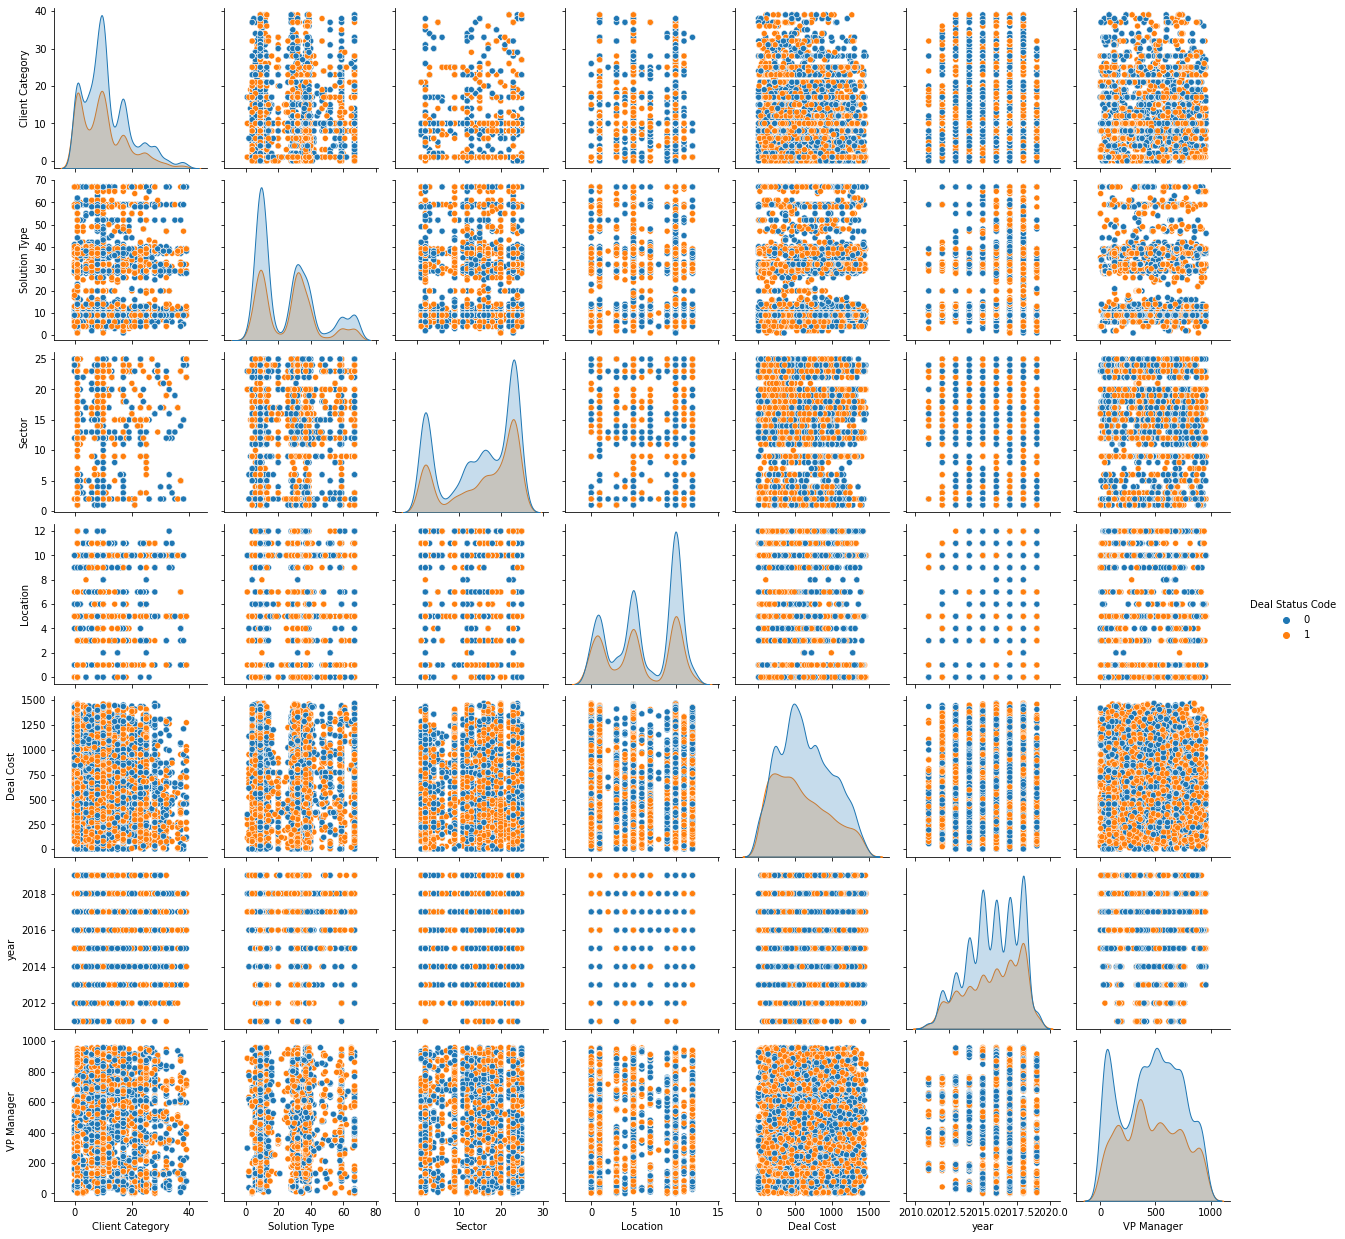

In [151]:
sns.pairplot(df_data, hue = 'Deal Status Code')

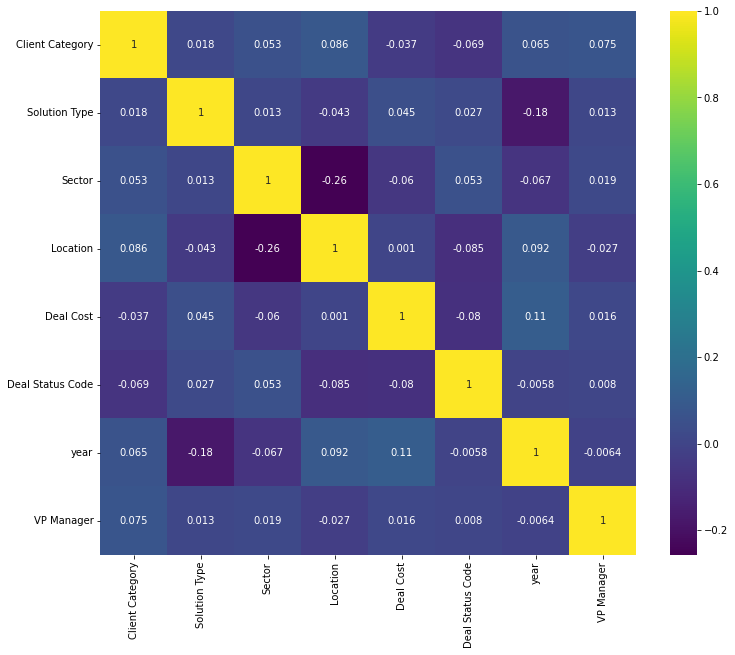

In [152]:
#Correlation plot

plt.figure(figsize=(12,10))
cor = df_data.corr()
sns.heatmap(cor,annot=True,cmap="viridis")
plt.show()

Seperating target variable and predictors

In [153]:
X = df_data.drop(['Deal Status Code'],axis=1)
y = df_data['Deal Status Code']

Feature Selection

Performing chi-square test for all variales except target variable

In [154]:
## Perform chi2 test and it returns 2 values :- Fscore and the pvalue
#chi square is used to determine whether it correlates to the categorical variables in our data.
from sklearn.feature_selection import chi2
f_p_values=chi2(X,y)

In [155]:
p_val=pd.DataFrame(f_p_values[1]).round()
p_val.index=X.columns
p_val.sort_index()

,0
Client Category,0.0
Deal Cost,0.0
Location,0.0
Sector,0.0
Solution Type,0.0
VP Manager,0.0
year,1.0


Null Hypothesis (Ho): There is no association between feature and target variable.

Alternate Hypothesis (Ha): There is association between feature and target variable.

If p-value < alpha value ,Reject Ho and accpet Ha.

Since p-values for all the features except Deal Year is less than alpha value (0.05) at 5% level of significance. So we will drop year and proceed further for our model buliding

In [156]:
X=X.drop(["year"],axis=1)

#Splitting dataset into training and testing data

In [157]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

In [158]:
from scipy.stats import anderson #used for view data is normally distrubute or not


In [159]:
anderson(df_data["Sector"])

AndersonResult(statistic=580.5760943559089, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

check value at 0.05 level is 0.787. statistic value is greater than 0.787.
so,we are reject null hypothesis
if data is not normally distribute then we have to use normalisation

In [160]:
# apply the min-max scaling (our output variable is 0 &1 ,so we are bringing all the cols in 0-1 range)
#standardized_dataset = (dataset - mean(dataset)) / standard_deviation(dataset))
#standardized_dataset = (dataset - np.average(dataset)) / (np.std(dataset))
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

x_train_scaled=pd.DataFrame(min_max.fit_transform(x_train),columns=x_train.columns.tolist())

x_test_scaled=pd.DataFrame(min_max.fit_transform(x_test),columns=x_test.columns.tolist())

x_train_scaled

,Client Category,Solution Type,Sector,Location,Deal Cost,VP Manager
0,0.025641,0.409091,0.791667,0.000000,0.101568,0.039666
1,0.333333,0.045455,0.041667,0.833333,0.925017,0.711900
2,0.128205,0.454545,0.041667,0.833333,0.798228,0.053236
3,0.589744,0.136364,0.958333,0.833333,0.626449,0.852818
4,0.256410,1.000000,0.208333,0.416667,0.427403,0.623173
...,...,...,...,...,...,...
7540,0.076923,1.000000,0.458333,0.083333,0.218814,0.406054
7541,0.025641,0.439394,0.791667,1.000000,0.756646,0.317328
7542,0.102564,0.045455,0.666667,0.250000,0.117928,0.439457
7543,0.000000,0.045455,0.958333,0.416667,0.082481,0.599165


In [161]:
#OR
def normal(x):
  norm=(x-x.min())/(x.max()-x.min())
  return norm

In [162]:
#x=X.iloc[:,:-1]
#x=X.iloc[:,:]
x_train_scaled=normal(x_train)
x_train_scaled

,Client Category,Solution Type,Sector,Location,Deal Cost,VP Manager
2999,0.025641,0.409091,0.791667,0.000000,0.101568,0.039666
7209,0.333333,0.045455,0.041667,0.833333,0.925017,0.711900
4017,0.128205,0.454545,0.041667,0.833333,0.798228,0.053236
3167,0.589744,0.136364,0.958333,0.833333,0.626449,0.852818
1822,0.256410,1.000000,0.208333,0.416667,0.427403,0.623173
...,...,...,...,...,...,...
3915,0.076923,1.000000,0.458333,0.083333,0.218814,0.406054
9620,0.025641,0.439394,0.791667,1.000000,0.756646,0.317328
7068,0.102564,0.045455,0.666667,0.250000,0.117928,0.439457
7391,0.000000,0.045455,0.958333,0.416667,0.082481,0.599165


Since our data is categorical we will apply Classification models on our data.

We applied models like Decision Tree classifier, Random Forest classifier, Bagging Classifier, Adaboost Classifier, Naive Bayes, KNN and indentified the model with highest accuracy.

Decision Tree Classifier

Text(0, 0.5, 'accuracy')

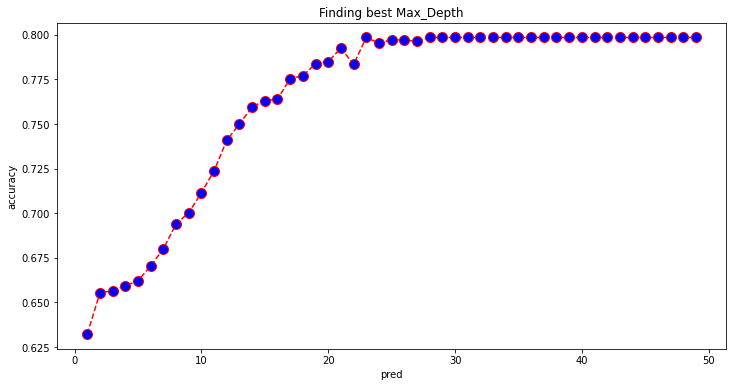

In [163]:
accuracy = [] 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

for i in range(1, 50):
  model = DecisionTreeClassifier(max_depth = i, random_state = 0)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  score = accuracy_score(y_test, pred)
  accuracy.append(score)

plt.figure(figsize=(12,6))
plt.plot(range(1, 50), accuracy, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Finding best Max_Depth')
plt.xlabel('pred')
plt.ylabel('accuracy')

In [164]:
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

clf_DT=DecisionTreeClassifier(criterion='gini',max_depth = 23,random_state=0)

#creating model using train data
model_DT=clf_DT.fit(x_train_scaled,y_train)

#prediction on test data
y_pred_DT=model_DT.predict(x_test_scaled)

print('Accuracy:',metrics.accuracy_score(y_test,y_pred_DT))
print(confusion_matrix(y_test,y_pred_DT))
print(classification_report(y_test,y_pred_DT))

Accuracy: 0.7861685214626392
[[1402  189]
 [ 349  576]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1591
           1       0.75      0.62      0.68       925

    accuracy                           0.79      2516
   macro avg       0.78      0.75      0.76      2516
weighted avg       0.78      0.79      0.78      2516



Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[10,50,100,150,200], 
              'max_depth':[4,6,8,9,10,11,12],
              "min_samples_leaf":[2,5,10,50]
             }

tr = RandomForestClassifier(random_state=89)
gsearch = GridSearchCV(tr, param_grid=parameters, cv=10, verbose=1, n_jobs=-1)
gsearch.fit(x_train,y_train)
print(gsearch.best_params_)
print(gsearch.best_score_)

In [165]:
from sklearn.ensemble import RandomForestClassifier

clf_RF=RandomForestClassifier(random_state=0)

#train model
model_RF=clf_RF.fit(x_train_scaled,y_train)

#prediction
y_pred_RF=model_RF.predict(x_test_scaled)
y_pred_RF

print('Accuracy:',metrics.accuracy_score(y_test,y_pred_RF))
print(confusion_matrix(y_test,y_pred_RF))
print(classification_report(y_test,y_pred_RF))

Accuracy: 0.8072337042925278
[[1483  108]
 [ 377  548]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1591
           1       0.84      0.59      0.69       925

    accuracy                           0.81      2516
   macro avg       0.82      0.76      0.78      2516
weighted avg       0.81      0.81      0.80      2516



Bagging Classifier

In [166]:
from sklearn.ensemble import BaggingClassifier

bagging=BaggingClassifier(model_RF,random_state=1)

#train model
model_BG=bagging.fit(x_train_scaled,y_train)

#Prediction
y_pred_BG=model_BG.predict(x_test_scaled)

print('Accuracy:',metrics.accuracy_score(y_test,y_pred_BG))
print(confusion_matrix(y_test,y_pred_BG))
print(classification_report(y_test,y_pred_BG))

Accuracy: 0.7968998410174881
[[1501   90]
 [ 421  504]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1591
           1       0.85      0.54      0.66       925

    accuracy                           0.80      2516
   macro avg       0.81      0.74      0.76      2516
weighted avg       0.81      0.80      0.78      2516



Adaboost Classifier

In [167]:
from sklearn.ensemble import AdaBoostClassifier

clf_ABC1=AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=0)

#train model
model_Ada=clf_ABC1.fit(x_train_scaled,y_train)

#Prediction
y_pred_Ada=model_Ada.predict(x_test_scaled)

print('Accuracy:',metrics.accuracy_score(y_test,y_pred_Ada))
print(confusion_matrix(y_test,y_pred_Ada))
print(classification_report(y_test,y_pred_Ada))

Accuracy: 0.6983306836248012
[[1427  164]
 [ 595  330]]
              precision    recall  f1-score   support

           0       0.71      0.90      0.79      1591
           1       0.67      0.36      0.47       925

    accuracy                           0.70      2516
   macro avg       0.69      0.63      0.63      2516
weighted avg       0.69      0.70      0.67      2516



Naive Bayes

In [168]:
from sklearn.naive_bayes import GaussianNB

naiv_bayes=GaussianNB()

#train model
model_NB=naiv_bayes.fit(x_train_scaled,y_train)

#prediction
y_pred_NB=model_NB.predict(x_test_scaled)

print('Accuracy:',metrics.accuracy_score(y_test,y_pred_NB))
print(confusion_matrix(y_test,y_pred_NB))
print(classification_report(y_test,y_pred_NB))

Accuracy: 0.634737678855326
[[1495   96]
 [ 823  102]]
              precision    recall  f1-score   support

           0       0.64      0.94      0.76      1591
           1       0.52      0.11      0.18       925

    accuracy                           0.63      2516
   macro avg       0.58      0.52      0.47      2516
weighted avg       0.60      0.63      0.55      2516



KNN Classifier

#best k value

Text(0, 0.5, 'Mean Error')

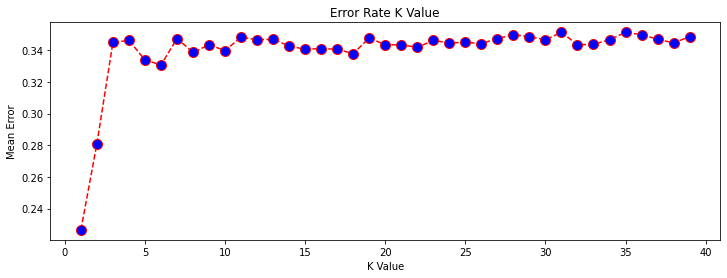

In [169]:
#Based on Minkowski Distance Metric we gonna classify the data points / p=1, Manhattan Distance.  p=2, Euclidean Distance
#Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (y)
#Manhattan Distance is the distance between real vectors using the sum of their absolute difference
#Hamming Distance is used for categorical variables. If the value ( and the value (y) are the same, the distance D will be equal to 0. Otherwise D=1
#clf_knn = KNeighborsClassifier (n neighbors = 16, metric = 'minkowski', p = 2)

error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
for i in range(1, 40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train, y_train)
  pred_i = model.predict(x_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 4))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
#From this figure, we can observe that K Value range from 15 to 35, our mean error is low

In [170]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
clf_knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
model_KNN= clf_knn.fit(x_train_scaled, y_train)

#Predict the response for test dataset
y_pred_KNN = model_KNN.predict(x_test_scaled)

print('Accuracy:',metrics.accuracy_score(y_test,y_pred_KNN))
print(confusion_matrix(y_test,y_pred_KNN))
print(classification_report(y_test,y_pred_KNN))

Accuracy: 0.7794117647058824
[[1406  185]
 [ 370  555]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.84      1591
           1       0.75      0.60      0.67       925

    accuracy                           0.78      2516
   macro avg       0.77      0.74      0.75      2516
weighted avg       0.78      0.78      0.77      2516



Summarising model performances

In [171]:
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy','Kappa Score']
models_report = pd.DataFrame(columns = cols)

tmp1 = pd.Series({'Model': " Decision Tree Classifier",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_DT),
                 'Precision Score': metrics.precision_score(y_test, y_pred_DT),
                 'Recall Score': metrics.recall_score(y_test, y_pred_DT),
                 'Accuracy': metrics.accuracy_score(y_test, y_pred_DT),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_DT)})
tmp2 = pd.Series({'Model': " Random Forest Classifier",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_RF),
                 'Precision Score': metrics.precision_score(y_test, y_pred_RF),
                 'Recall Score': metrics.recall_score(y_test, y_pred_RF),
                 'Accuracy': metrics.accuracy_score(y_test, y_pred_RF),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_RF)})
tmp3 = pd.Series({'Model': " Bagging Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_BG),
                 'Precision Score': metrics.precision_score(y_test, y_pred_BG),
                 'Recall Score': metrics.recall_score(y_test, y_pred_BG),
                 'Accuracy': metrics.accuracy_score(y_test, y_pred_BG),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_BG)})
tmp4 = pd.Series({'Model': " Adaboost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_Ada),
                 'Precision Score': metrics.precision_score(y_test, y_pred_Ada),
                 'Recall Score': metrics.recall_score(y_test, y_pred_Ada),
                 'Accuracy': metrics.accuracy_score(y_test, y_pred_Ada),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_Ada)})
tmp5 = pd.Series({'Model': " Naive Bayes ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_NB),
                 'Precision Score': metrics.precision_score(y_test, y_pred_NB),
                 'Recall Score': metrics.recall_score(y_test, y_pred_NB),
                 'Accuracy': metrics.accuracy_score(y_test, y_pred_NB),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_NB)})
tmp6 = pd.Series({'Model': " KNN Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_KNN),
                 'Precision Score': metrics.precision_score(y_test, y_pred_KNN),
                 'Recall Score': metrics.recall_score(y_test, y_pred_KNN),
                 'Accuracy': metrics.accuracy_score(y_test, y_pred_KNN),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_KNN)})

model_DT_report = models_report.append(tmp1,ignore_index = True)

model_RF_report= model_DT_report.append(tmp2,ignore_index = True)

model_BG_report= model_RF_report.append(tmp3,ignore_index = True)

model_ADA_report= model_BG_report.append(tmp4,ignore_index = True)

model_NB_report= model_ADA_report.append(tmp5,ignore_index = True)

model_KNN_report= model_NB_report.append(tmp6,ignore_index = True)

model_KNN_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy,Kappa Score
0,Decision Tree Classifier,0.751955,0.752941,0.622703,0.786169,0.522838
1,Random Forest Classifier,0.762275,0.835366,0.592432,0.807234,0.558548
2,Bagging Classifier,0.744148,0.848485,0.544865,0.796900,0.527829
3,Adaboost Classifier,0.626838,0.668016,0.356757,0.698331,0.281090
4,Naive Bayes,0.524965,0.515152,0.110270,0.634738,0.059762
5,KNN Classifier,0.741860,0.750000,0.600000,0.779412,0.504854


The Precision(PPV) is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The Recall(Sensitivity) is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

It is evident from above table that Random Forest Classifier is having highest accuracy of 80 % as compared to other models hence we will do the final prediction based on this model.

Accuracy: 0.8072337042925278
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1591
           1       0.84      0.59      0.69       925

    accuracy                           0.81      2516
   macro avg       0.82      0.76      0.78      2516
weighted avg       0.81      0.81      0.80      2516



Text(0.5, 15.0, 'Predicted label')

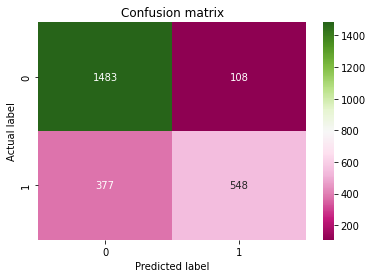

In [181]:
from sklearn.metrics import plot_roc_curve , plot_confusion_matrix, plot_precision_recall_curve
from sklearn.metrics import accuracy_score

y_pred = model_RF.predict(x_test_scaled)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
 
#Confusion Matrix    
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='PiYG',fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

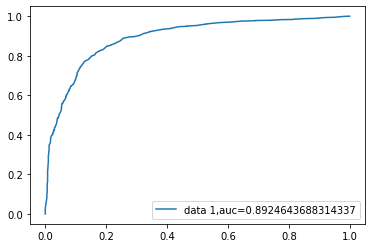

In [173]:
#ROC Curve

y_pred_proba=model_RF.predict_proba(x_test_scaled)[::,1]
fpr,tpr,_ =metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='data 1,auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [174]:
importances = pd.DataFrame({ 
    'Feature': df_data.drop(['Deal Status Code','year'],axis=1).columns,
    'Importance': model_RF.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
Deal Cost,0.310292
VP Manager,0.247635
Solution Type,0.142570
Client Category,0.128717
Sector,0.098456
Location,0.072330


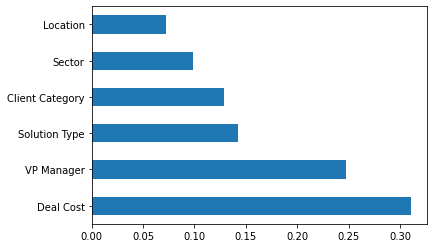

In [175]:
## Feature importance plot based on our model
#feature importance plot

(pd.Series(model_RF.feature_importances_,index=X.columns).nlargest(10).plot(kind='barh'))